In [1]:
import numpy as np
def m_p(inputs,weights,threshold):
    weight_sum=np.dot(inputs,weights)
    if weight_sum>=threshold:
        output=1
    else:
        output=0
    return output

print("x1")
x1=[]
for i in range(4):
    a=int(input())
    x1.append(a)
    
print("x2")
x2=[]
for i in range(4):
    a=int(input())
    x2.append(a)   
    
def and_not(x1,x2):
    weights=[0.5,-0.5]
    threshold=0.5
    outputs=[]
    for i in range(len(x1)):
        inputs=np.array([x1[i],x2[i]])
        output=m_p(inputs,weights,threshold)
        outputs.append(output)
    return outputs
result=and_not(x1,x2)
print("output:",result)

x1


 0
 0
 1
 1


x2


 0
 1
 0
 1


output: [0, 0, 1, 0]


In [2]:
import numpy as np
def aggregation(inputs,weights,bias):
    weight_sum=np.dot(inputs,weights)+bias
    return weight_sum
def tlu(weight_sum,threshold):
    if weight_sum>=threshold:
        output=1
    else:
        output=0
    return output
a=[
    {'input':[1,1,0,0,0,0]},
    {'input':[1,1,0,0,0,1]},
    {'input':[1,1,0,0,1,0]},
    {'input':[1,1,0,0,1,1]},
    {'input':[1,1,0,1,0,0]},
    {'input':[1,1,0,1,0,1]},
    {'input':[1,1,0,1,1,0]},
    {'input':[1,1,0,1,1,1]},
    {'input':[1,1,1,0,0,0]},
    {'input':[1,1,1,0,0,1]},

]
threshold=float(input("enter threshold"))
n=float(input("enter eta"))
weights=[0,0,0,0,0,1]
bias=0.1
for data in a:
    inputs=np.array(data['input'])
    if np.sum(inputs)%2==0:
        d=0
    else:
        d=1

def error(d,output):
    error=d-output
    return error
def weight_change(d,inputs,error):
    w=np.dot(d,error*inputs)
    weights+=w
    return weights

a=int(input("enter value between 0 to 9")) 
inputs=np.array([int(bit) for bit in bin(a) [2:].zfill(6)])
weight_sum=aggregation(inputs,weights,bias)
outputs=tlu(threshold,weight_sum)
if outputs==1:
    outputs='even'
else:
    outputs='odd'
print(outputs)    


enter threshold 0.5
enter eta 0.1
enter value between 0 to 9 6


even


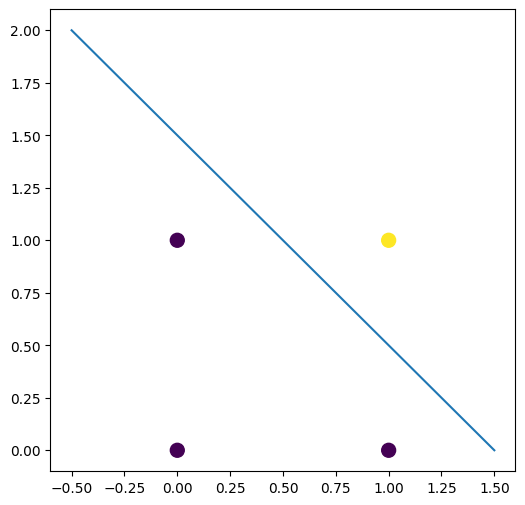

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,0,0,1])

w1,w2=1,1
b=-1.5

def perceptron(x,w1,w2,b):
    if(w1*x[0]+w2*x[1]+b)>=0:
        return 1
    else:
        return 0

plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y,s=100)

x_line=np.linspace(-0.5,1.5,100)
y_line=(-w1*x_line-b)/w2

plt.plot(x_line,y_line)
plt.show()

In [4]:
import numpy as np

# Activation function and its derivative (Sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training data (XOR problem as a simple test)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output (XOR)
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases randomly
np.random.seed(42)
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1

# Weights
weights_input_hidden = np.random.rand(input_layer_size, hidden_layer_size)
weights_hidden_output = np.random.rand(hidden_layer_size, output_layer_size)

# Biases
bias_hidden = np.random.rand(1, hidden_layer_size)
bias_output = np.random.rand(1, output_layer_size)

# Training loop
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # ----------- FORWARD PROPAGATION -----------
    # Hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    # Output layer
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # ----------- BACKPROPAGATION -----------
    # Error at output
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    # Error at hidden layer
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss:}")

# Final predictions
print("\nFinal Output After Training:")
print(final_output.round(3))
print(final_output.round())

Epoch 0, Loss: 0.38554734413938047
Epoch 1000, Loss: 0.2394687602093746
Epoch 2000, Loss: 0.18982505370553016
Epoch 3000, Loss: 0.1314434744618484
Epoch 4000, Loss: 0.04596551010834204
Epoch 5000, Loss: 0.016832860014460226
Epoch 6000, Loss: 0.008781204174560069
Epoch 7000, Loss: 0.005601136933785677
Epoch 8000, Loss: 0.00399949926402412
Epoch 9000, Loss: 0.0030629455034079504

Final Output After Training:
[[0.05 ]
 [0.947]
 [0.957]
 [0.051]]
[[0.]
 [1.]
 [1.]
 [0.]]


In [5]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and prepare data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features - FIXED: First fit, then transform
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler that was fit on training data

# 2. Build and train model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', input_shape=(4,))
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

# 3. Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

C:\Users\Rutik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.90


In [8]:
import numpy as np
vector=np.array([[1,1,1,-1],
                 [-1,0,1,-1],
                 [1,-1,0,-1],
                 [-1,1,-1,0]
                ])

weights=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        if i==j:
            weights[i][j]=(vector[i]@vector[j])/4

def activation(x):
    if x>=0:
        return 1
    else:
        return -1

def hopfield(x,weights):
    y=np.copy(x)
    for i in range(4):
        sum=0
        for j in range(4):
            sum+=weights[i][j]*y[j]
        y[i]=activation(sum)
    return y

for i in range(4):
    print("input vector:",vector[i])
    output=hopfield(vector[i],weights)
    print("output vector:",output)


input vector: [ 1  1  1 -1]
output vector: [ 1  1  1 -1]
input vector: [-1  0  1 -1]
output vector: [-1  1  1 -1]
input vector: [ 1 -1  0 -1]
output vector: [ 1 -1  1 -1]
input vector: [-1  1 -1  0]
output vector: [-1  1 -1  1]


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - bbox_loss: 13.5213 - bbox_mse: 13.5213 - class_accuracy: 0.1831 - class_loss: 2.5417 - loss: 16.0630 - val_bbox_loss: 0.0480 - val_bbox_mse: 0.0481 - val_class_accuracy: 0.3372 - val_class_loss: 1.8139 - val_loss: 1.8623
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - bbox_loss: 0.0832 - bbox_mse: 0.0832 - class_accuracy: 0.3857 - class_loss: 1.6736 - loss: 1.7568 - val_bbox_loss: 0.0667 - val_bbox_mse: 0.0668 - val_class_accuracy: 0.4399 - val_class_loss: 1.5410 - val_loss: 1.6078
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - bbox_loss: 0.0633 - bbox_mse: 0.0633 - class_accuracy: 0.4515 - class_loss: 1.5169 - loss: 1.5802 - val_bbox_loss: 0.0512 - val_bbox_mse: 0.0512 - val_class_accuracy: 0.4659 - val_class_loss: 1.4991 - val_loss: 1.5508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


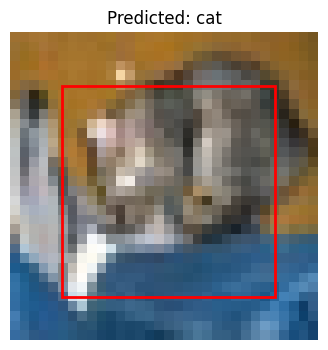

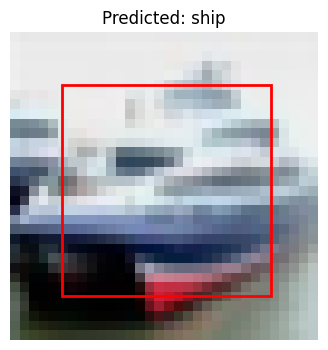

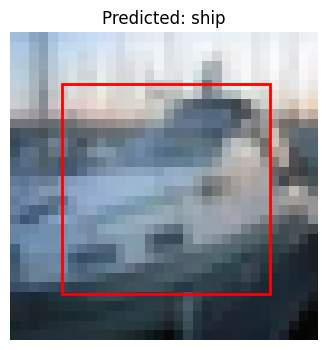

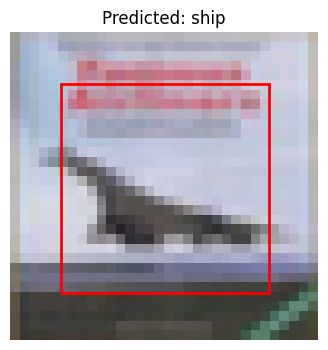

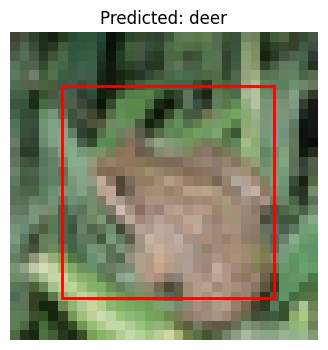

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models,datasets
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Create fixed bounding boxes (5px margin)
bbox_train = np.array([[5,27,5,27]]*len(x_train))
bbox_test = np.array([[5,27,5,27]]*len(x_test))

# Build model
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x) 
x = layers.MaxPooling2D(2,2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

outputs = [
    layers.Dense(10, activation='softmax', name='class')(x),
    layers.Dense(4, name='bbox')(x)
]

model = models.Model(inputs, outputs)

# Compile and train
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy', 'mse'],
              metrics=['accuracy', 'mse'])

model.fit(x_train, [y_train, bbox_train],
          epochs=3,
          validation_data=(x_test, [y_test, bbox_test]))
sample = x_test[:5]  # Take 5 images
class_pred, bbox_pred = model.predict(sample)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(5):
    img = sample[i]
    pred_class = np.argmax(class_pred[i])  # predicted class index
    pred_box = bbox_pred[i]                # predicted bounding box
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.gca().add_patch(plt.Rectangle(
        (pred_box[2], pred_box[0]),         # (left, top)
        pred_box[3] - pred_box[2],           # width
        pred_box[1] - pred_box[0],           # height
        linewidth=2, edgecolor='r', facecolor='none'
    ))
    plt.title(f"Predicted: {class_names[pred_class]}")
    plt.axis('off')
    plt.show()

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - bbox_loss: 11.2264 - bbox_mse: 11.2264 - class_accuracy: 0.6105 - class_loss: 1.4554 - loss: 12.6819 - val_bbox_loss: 0.0571 - val_bbox_mse: 0.0571 - val_class_accuracy: 0.9364 - val_class_loss: 0.2132 - val_loss: 0.2706
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - bbox_loss: 0.0368 - bbox_mse: 0.0368 - class_accuracy: 0.9431 - class_loss: 0.1884 - loss: 0.2252 - val_bbox_loss: 0.0169 - val_bbox_mse: 0.0169 - val_class_accuracy: 0.9683 - val_class_loss: 0.1042 - val_loss: 0.1212
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - bbox_loss: 0.0247 - bbox_mse: 0.0247 - class_accuracy: 0.9632 - class_loss: 0.1206 - loss: 0.1454 - val_bbox_loss: 0.0165 - val_bbox_mse: 0.0165 - val_class_accuracy: 0.9768 - val_class_loss: 0.0787 - val_loss: 0.0953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


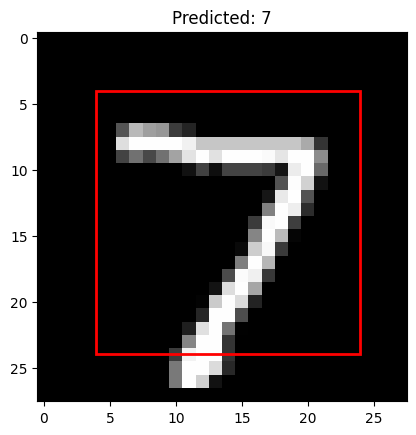

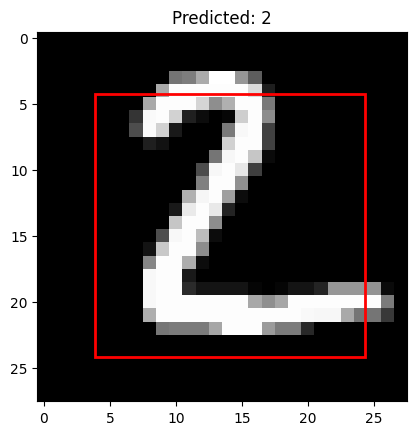

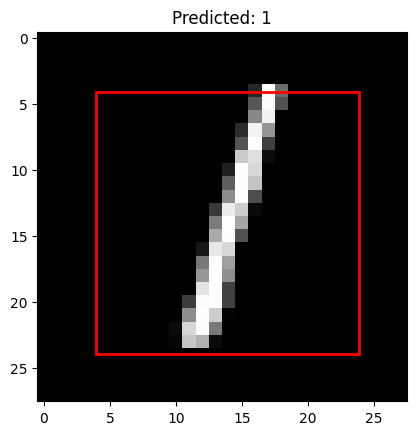

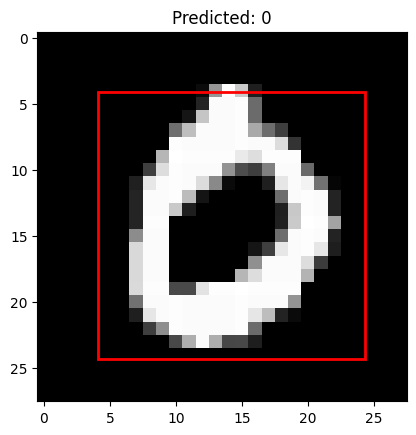

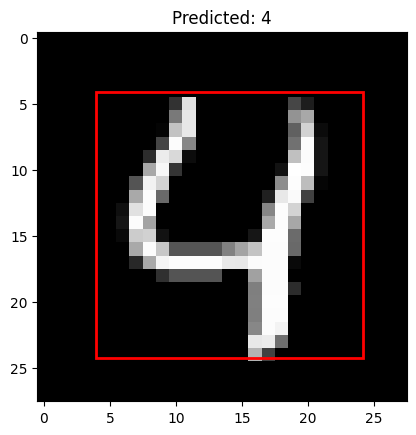

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and prepare MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
#x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_train = x_train/255.0
x_test = x_test/255.0
# Create simple bounding boxes (center 20x20 box)
#def make_boxes(images):
    #return np.array([[4, 24, 4, 24] for _ in range(len(images))], dtype='float32')

bbox_train = np.array([[4,24,4,24]]*len(x_train))
bbox_test = np.array([[4,24,4,24]]*len(x_test))
#bbox_test = make_boxes(x_test)

# Build model using Functional API
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)

# Two output layers
outputs=[
    
    layers.Dense(10, activation='softmax', name='class')(x),
    layers.Dense(4, name='bbox')(x)
]

model = models.Model(inputs, outputs)

# Compile model
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy', 'mse'],
              metrics=[ 'accuracy', 'mse'])

# Train model
model.fit(x_train, [y_train,bbox_train],
          epochs=3,
          validation_data=(x_test,[y_test,bbox_test])
                   )

# Test predictions
sample = x_test[:5]
class_pred, bbox_pred = model.predict(sample)


# Show results
for i in range(5):
    plt.imshow(sample[i].squeeze(), cmap='gray')
    box = bbox_pred[i]
    plt.gca().add_patch(plt.Rectangle(
        (box[2], box[0]), box[3]-box[2], box[1]-box[0],
        linewidth=2, edgecolor='r', facecolor='none'))
    plt.title(f"Predicted: {np.argmax(class_pred[i])}")
    plt.show()